# Comparison of different clustering algorithms
with a focus on Mean Shift and Fuzzy C-Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from clustertools.load_data import load_spiral_data, load_aggregation_data, load_birch1_data, load_birch3_data, load_compound_data, load_flame_data, load_pathbased_data, load_sets_data, scale_data, load_fuzzy_data
from timeit import default_timer as timer 
from clustertools.models.distance import KMeans, Regspace
from clustertools.models.density import MeanShift, plot_kde
from clustertools.models.fuzzy import FuzzyCMeans
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#set font sizes for matplotlib plots and seaborn plots
fontsizeset = 20
rc={'axes.labelsize': fontsizeset, 'font.size': fontsizeset, 'legend.fontsize': fontsizeset, 'axes.titlesize': fontsizeset,'xtick.labelsize': fontsizeset, 'ytick.labelsize': fontsizeset}
sns.mpl.rcParams.update(rc)

### Clustering on different data sets

In [3]:
def format_subplots():
    plt.figure(figsize=(30,8))
    ax1 = plt.subplot2grid((2,5), (0, 0))
    ax2 = plt.subplot2grid((2,5), (0, 1))
    ax3 = plt.subplot2grid((2,5), (0, 2))
    ax4 = plt.subplot2grid((2,5), (0, 3))
    ax5 = plt.subplot2grid((2,5), (0, 4))
    ax6 = plt.subplot2grid((2,5), (1,0), colspan=6)
    ax = [ax1,ax2, ax3, ax4, ax5]
    row_labels=[ 'Computing time [s]', 'iter = # of iterations',  'k = # of clusters', 'Mean cluster-center distance']
    column_labels=['Spiral','Aggregation','Compound', 'Fuzzy', 'Pathbased']
    return ax, row_labels, column_labels

In [4]:
def format_table_data(dataset,estimatecluster, saveas = 'images/tabledataset.png'):
    ax, row_labels, column_labels = format_subplots()
    row_labels = ['       n = # of datapoints', 'd = dimension', 'estimated # of clusters']
    datasetresults = np.zeros((3,np.shape(dataset)[0]))
    for i in range(np.shape(dataset)[0]):
        data = dataset[i]
        datasetresults[ 0,i] = int(np.size(data,0))
        datasetresults[ 1,i] = int(np.size(data,1))
        ax[i].scatter(data[:,0],data[:,1],alpha=.3)
        ax[i].axis('off')
    datasetresults[2,:] = estimatecluster

    df = pd.DataFrame(datasetresults[:,:],row_labels , column_labels)
    ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu",annot_kws={"size": fontsizeset})
    plt.title('Data sets', fontsize=fontsizeset)
    plt.show()
    #plt.savefig(saveas)
    

Load data sets and pre-process (scale to mean 0 and standard deviation 1) 

In [5]:
spiral=load_spiral_data(scale = 'True')
aggr=load_aggregation_data(scale = 'True')
compound = load_compound_data(scale = 'True')
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]
pathbased = load_pathbased_data(scale = 'True')
dataset = [spiral, aggr, compound, fuzzy, pathbased]

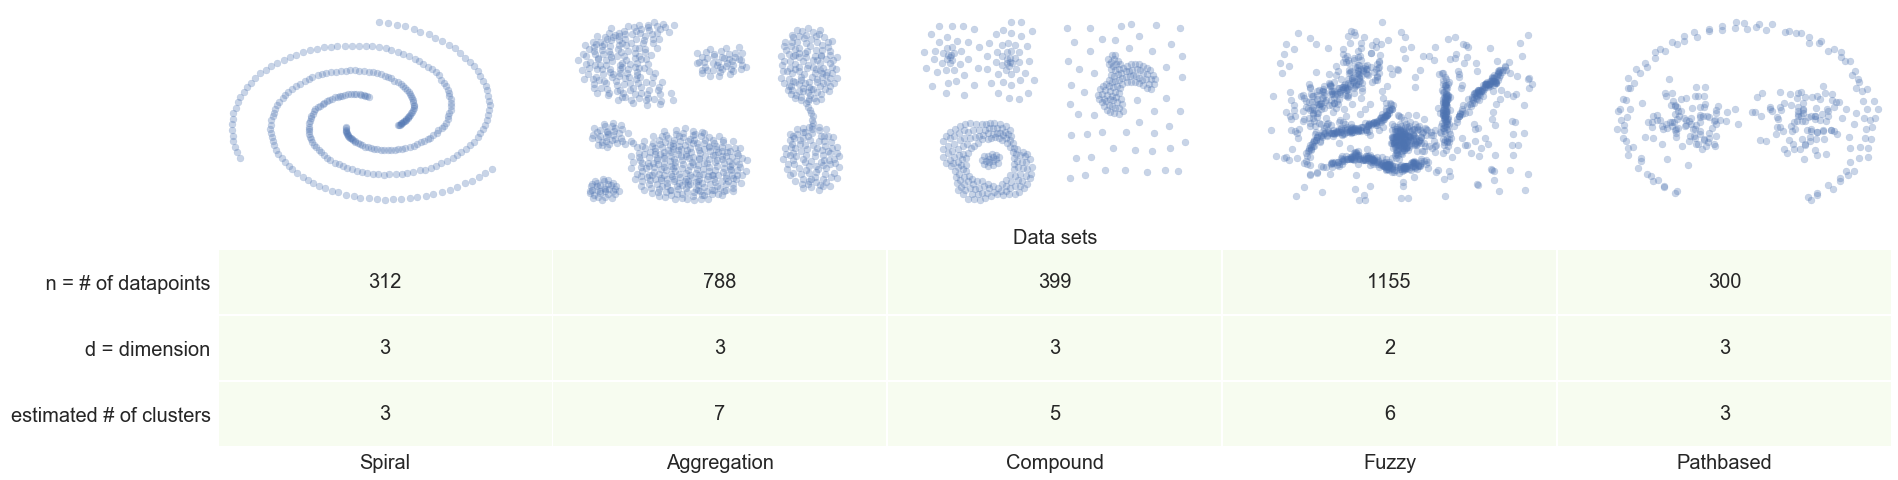

In [6]:
format_table_data(dataset, np.array([3,7,5,6,3]))

Using Fuzzy C-means on the 5 data sets

Note: In the visualization the fuzzyness is not depicted. Every point is just coloured with the colour of the cluster where it has the highest membership value to.

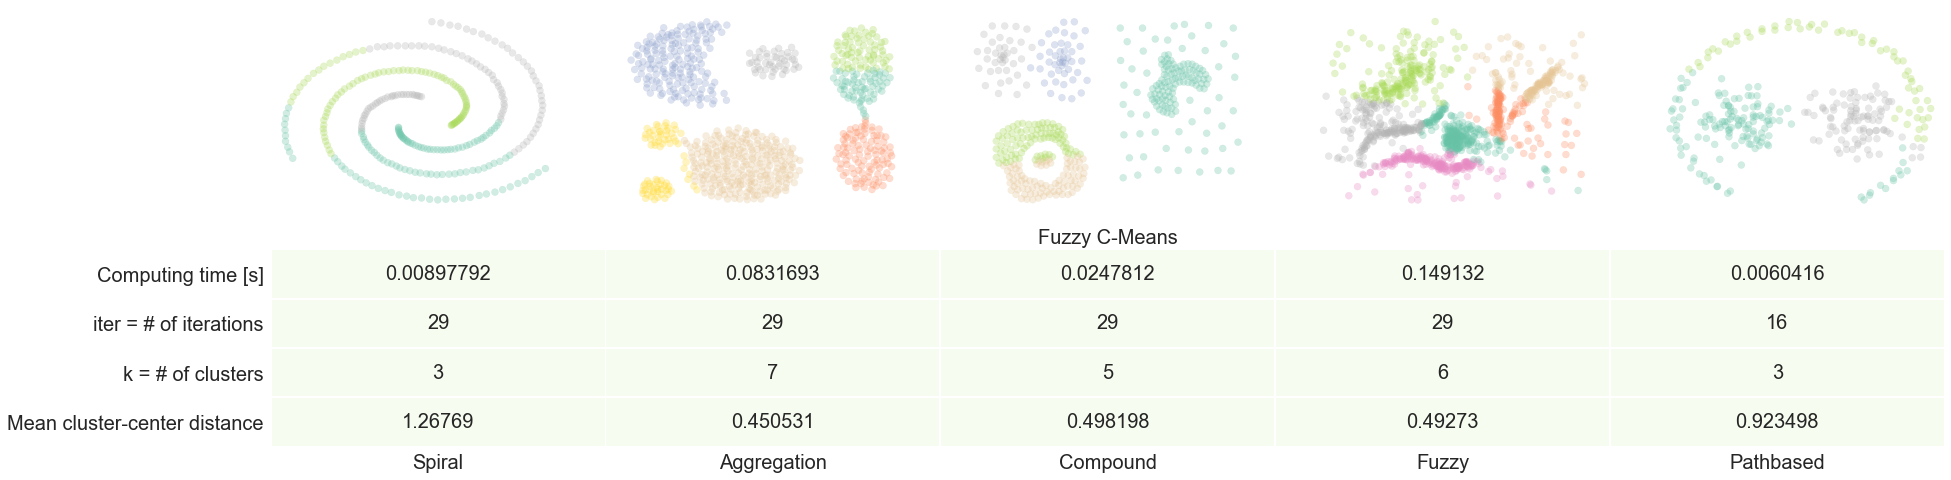

In [7]:
ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    f = FuzzyCMeans(data,c, verbose = False )
    f.fit()
    labels = f._cluster_labels
    results[ 3,i] = np.mean(f._cluster_dist)
    results[ 0,i] = f._time
    results[ 1,i] = f._iter 
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')


df = pd.DataFrame(results[:,:], row_labels, column_labels)
ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu")
plt.title('Fuzzy C-Means')
plt.show()
#plt.savefig('images/tablefuzzy.png')

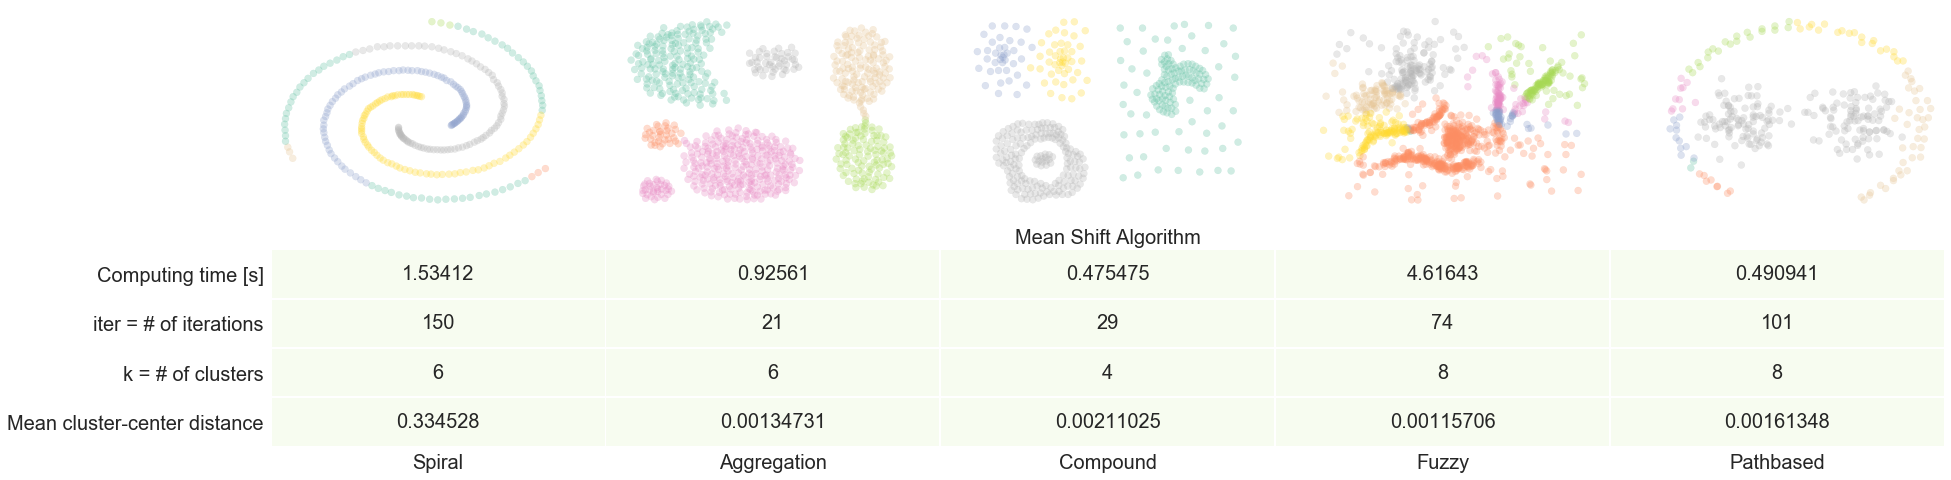

In [8]:
ax, row_labels, column_labels = format_subplots()
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    ms = MeanShift(data, verbose = False)
    ms.fit()
    labels = ms._cluster_labels
    results[3,i] = np.mean(ms._cluster_dist)
    results[0,i] = ms._time
    results[1,i] = ms._iter 
    results[2,i] = max(labels)
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')

df = pd.DataFrame(results[:,:], row_labels, column_labels)

ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True, cbar = False, fmt="g", linewidths=1, cmap="GnBu")

plt.title('Mean Shift Algorithm')
plt.show()
#plt.savefig('images/tablemeanshift.png')

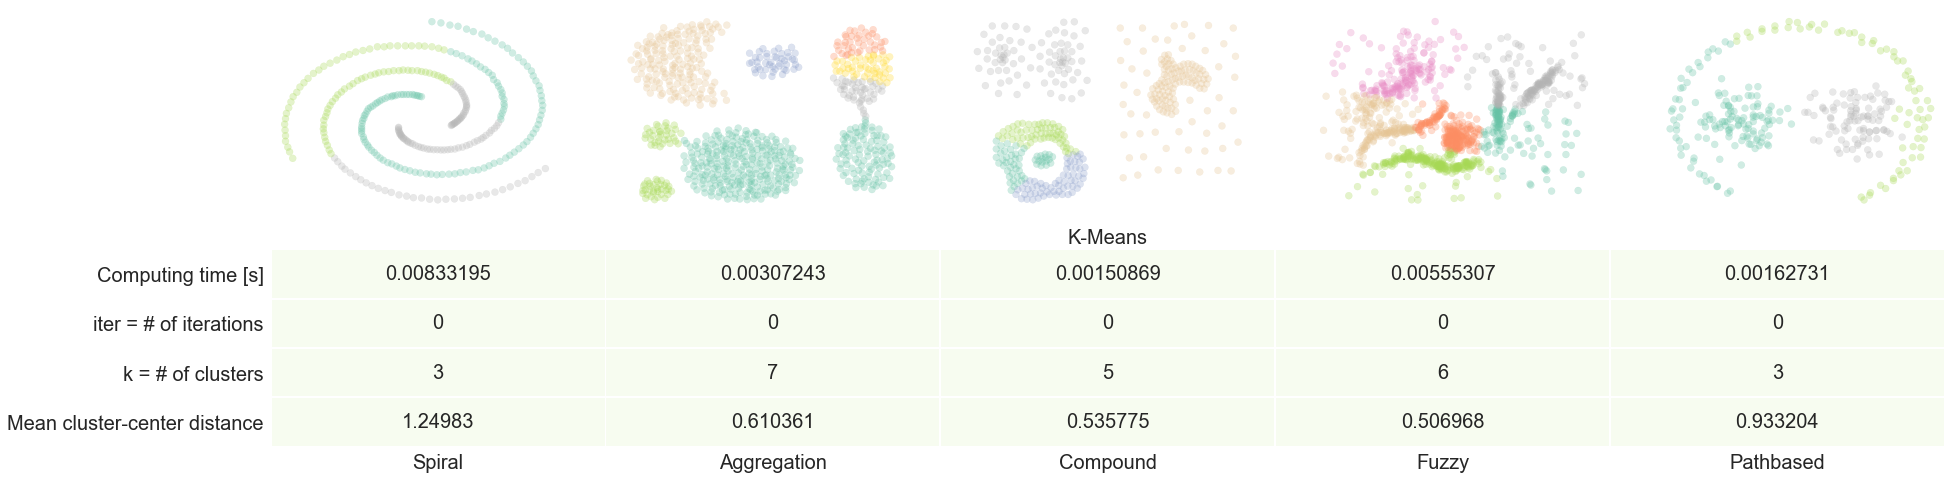

In [9]:
ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    start_time = timer()
    k = KMeans(data,c, verbose = False )
    k.fit()
    time_taken = timer() - start_time
    labels = k._cluster_labels
    results[ 3,i] = np.mean(k._cluster_dist)
    results[ 0,i] = time_taken
    results[ 1,i] = 0 #need to add iteration counter to kmeans code, just set to 0 for now
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')


df = pd.DataFrame(results[:,:], row_labels, column_labels)
ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu")
plt.title('K-Means')
plt.show()
#plt.savefig('images/tablekmeans.png')

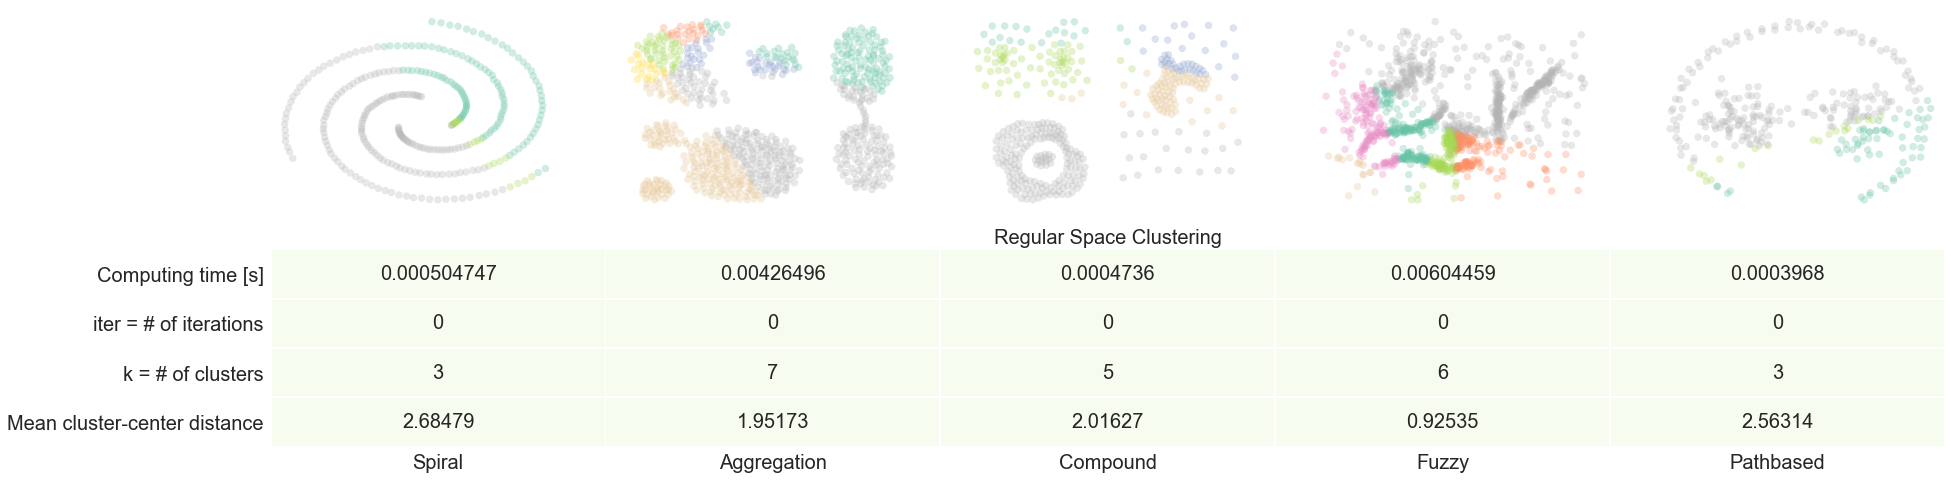

In [10]:
ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    start_time = timer()
    r = Regspace(data,c,0.5, verbose=False)
    r.fit()
    time_taken = timer() - start_time
    labels = r._cluster_labels
    results[ 3,i] = np.mean(r._cluster_dist)
    results[ 0,i] = time_taken
    results[ 1,i] = 0 #need to add iteration counter to regspace code, just set to zero for now
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')


df = pd.DataFrame(results[:,:], row_labels, column_labels)
ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu")
plt.title('Regular Space Clustering')
plt.show()
#plt.savefig('images/tableregspace.png')

## In more detail: Mean Shift Algorithm

The mean shift algorithm builds on the idea that the data points represent samples from some underlying probability density function. In that way, dense regions correspond to clusters, local maxima correspond to cluster centers and points in sparse areas might be outliers or noise.

In [11]:
def plot_mean_shift(data, labels, results, bandwidth, outliers, save=None, name = 'images/meanshiftpaper.png'): 
 
    f, axarr = plt.subplots(1,4, figsize=(30,8))

    axarr[0].scatter(data[:,0],data[:,1],alpha=.6)
    axarr[0].axis('off')

    axarr[3].scatter(data[:,0],data[:,1],alpha=.6, c = labels, cmap='Set2')
    if outliers >0:
        axarr[3].axis('off')
    else:
        axarr[3].scatter(data[labels==0][:,0],data[labels==0][:,1],s = 100, alpha=.3, marker='*')    
        axarr[3].axis('off')   
    
    [X, Y, Z] = plot_kde(data[:,0], data[:,1], bandwidth) 
    ma=np.max(np.max(Z)) #max of density
    mi=np.min(np.min(Z)) #min of density
    levels=0.8*np.arange(mi,ma+(ma-mi)*0.099,(ma-mi)*0.1) #specify contour levels
    axarr[1].contour(X,Y,Z, levels)
    axarr[1].scatter(data[:,0],data[:,1],alpha=.08)
    axarr[1].axis('off')
    
    axarr[2].contour(X,Y,Z, levels)
    axarr[2].scatter(results[:,0], results[:,1],alpha=1)
    axarr[2].axis('off')  
    
    axarr[0].set_title('Data points', fontsize=fontsizeset)
    axarr[3].set_title('Clustering', fontsize=fontsizeset)
    axarr[2].set_title('Shifted points', fontsize=fontsizeset)
    axarr[1].set_title('Kernel density estimation', fontsize=fontsizeset)
    plt.tight_layout()
    if save == None:
        plt.show()
    else: 
        plt.savefig(name)

116 iterations until termination.
Used bandwidth: 0.250000
Finished after 3.8995434666666657
Number of clusters found: 9.000000
There is/are 1.000000 outliers
Max within cluster distance to center: 0.030544
Mean within cluster distance to center: 0.003803
Sum of within cluster squared errors: 0.026143


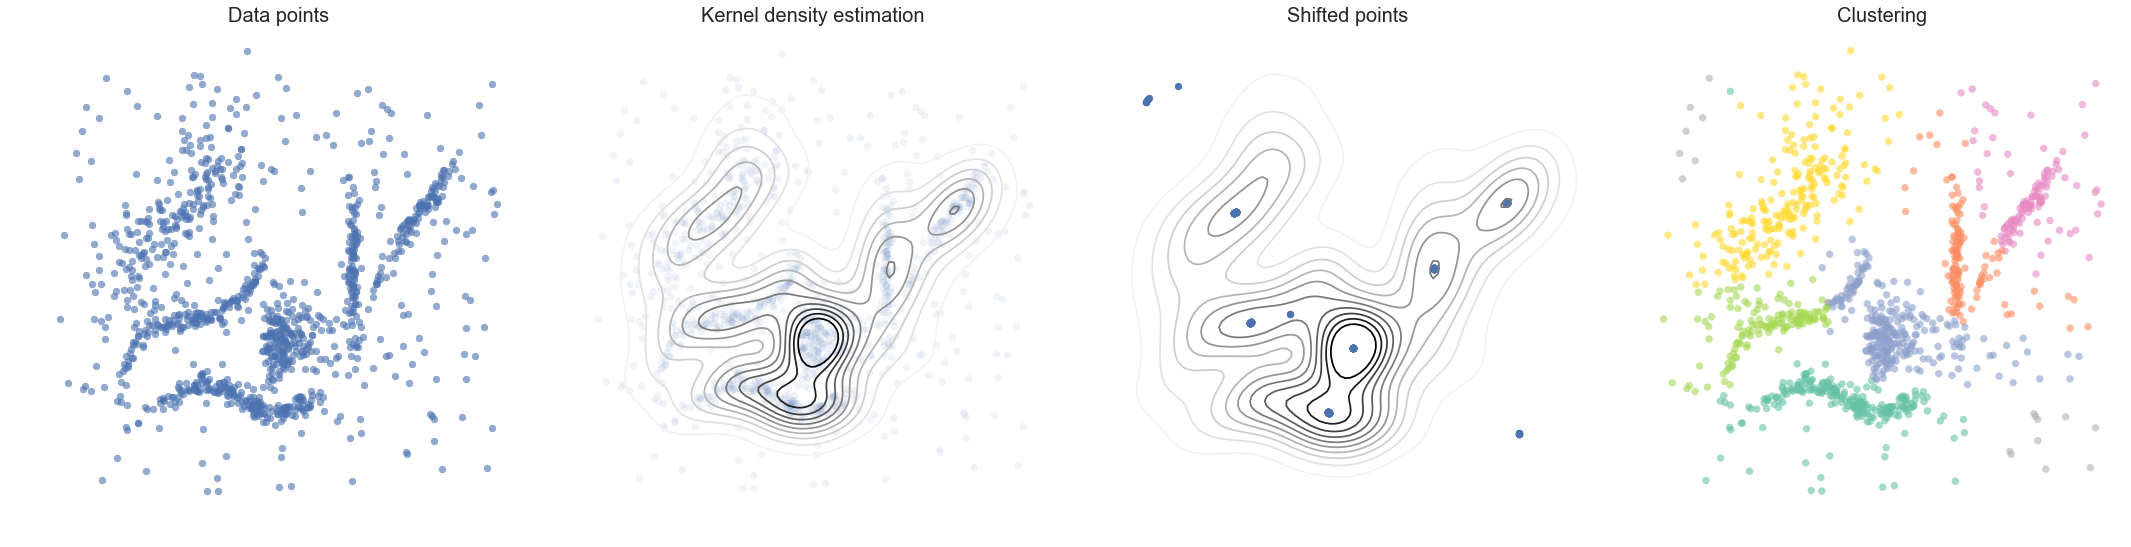

In [12]:
data = fuzzy
bandwidth = 0.25
ms = MeanShift(data, bandwidth, mindist=0.03)
ms.fit()
labels = ms._cluster_labels
bandwidth = ms._bandwidth   
outliers = ms._outliers 
results = ms._results
plot_mean_shift(data, labels, results, bandwidth, outliers, save=True, name = 'images/meanshiftpaper.pdf')


21 iterations until termination.
Used bandwidth: 0.350000
Finished after 1.038512213333334
Number of clusters found: 7.000000
There is/are 0.000000 outliers
Max within cluster distance to center: 0.003157
Mean within cluster distance to center: 0.001893
Sum of within cluster squared errors: 0.003319


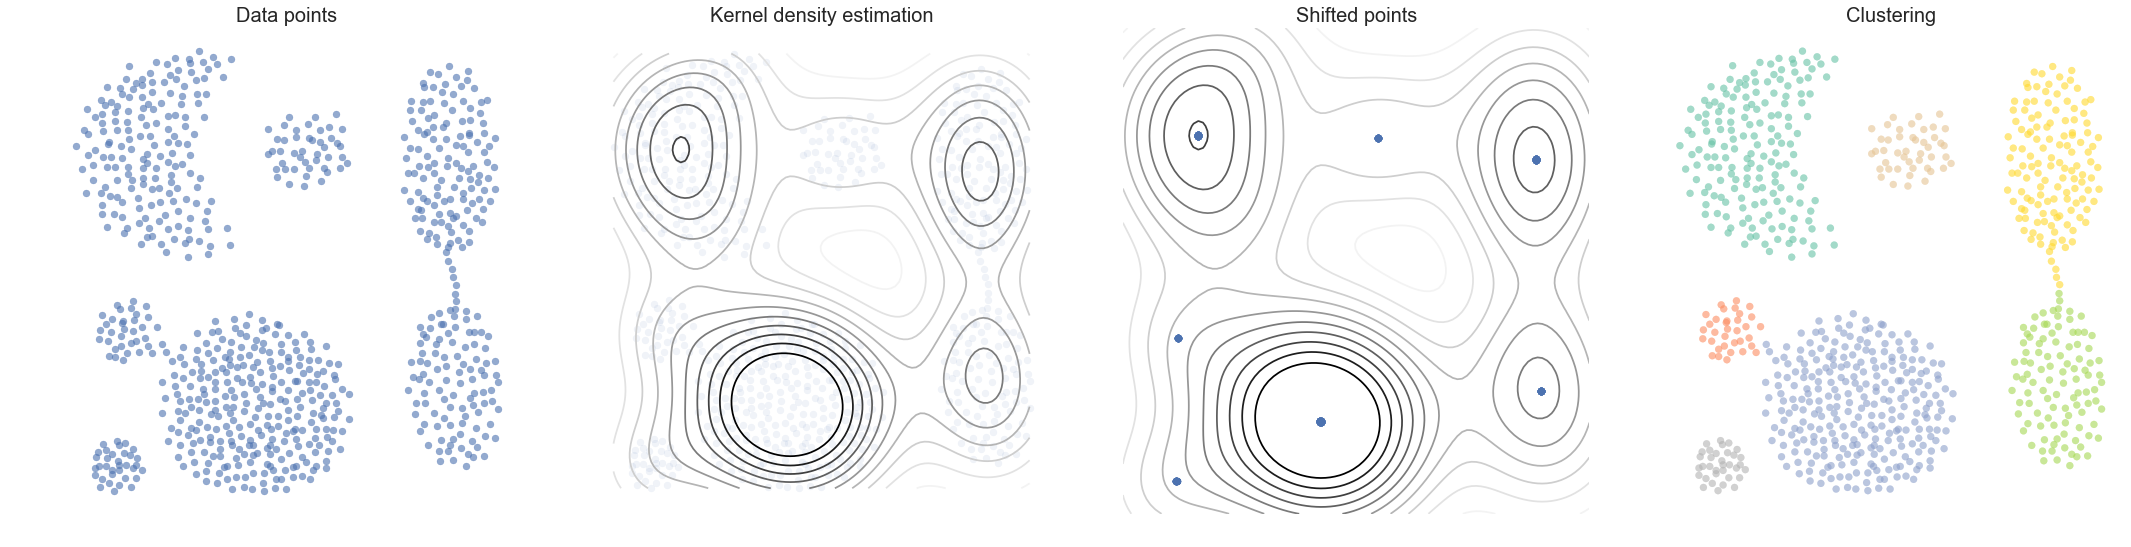

In [13]:
data = load_aggregation_data(scale = 'True')
ms = MeanShift(data,0.35)
ms.fit()
labels = ms._cluster_labels
bandwidth = ms._bandwidth   
outliers = ms._outliers 
results = ms._results
plot_mean_shift(data, labels, results, bandwidth, outliers, save=True, name = 'images/meanshiftpaper2.pdf')

Bandwidth estimation only works well for scaled data, preprocess the data first using scale_data() if that is not the case.
29 iterations until termination.
Used bandwidth: 0.425043
Finished after 0.5618956800000028
Number of clusters found: 4.000000
There is/are 0.000000 outliers
Max within cluster distance to center: 0.005595
Mean within cluster distance to center: 0.002110
Sum of within cluster squared errors: 0.003052


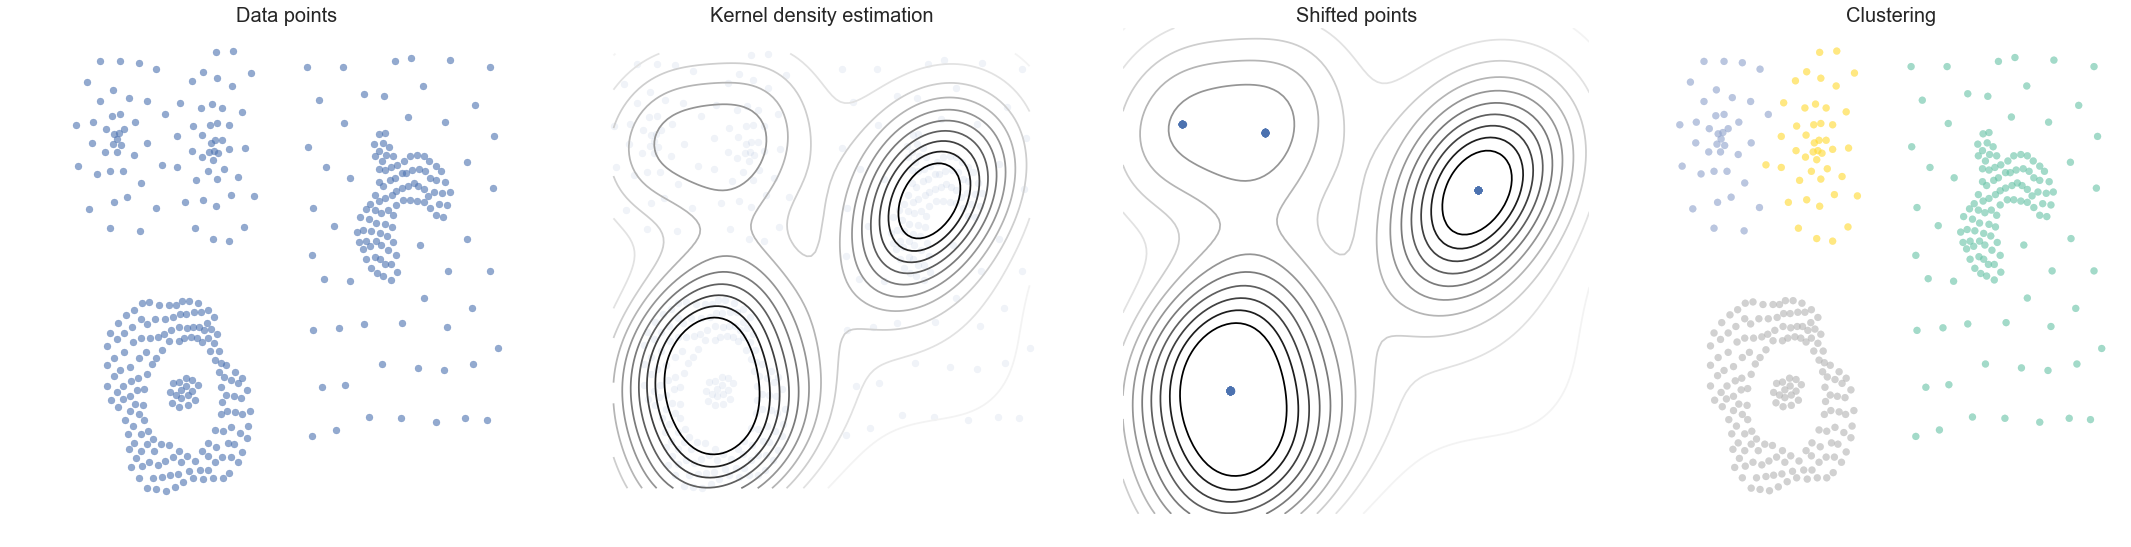

In [14]:
data=load_compound_data(scale = 'True')
ms = MeanShift(data)
ms.fit()
labels = ms._cluster_labels
bandwidth = ms._bandwidth   
outliers = ms._outliers 
results = ms._results
plot_mean_shift(data, labels, results, bandwidth, outliers, save=True, name = 'images/meanshiftpaper3.pdf')

## In more detail: Fuzzy C-means

Fuzzyness of the clustering means that each data point has some degree of membership to each cluster (= some likelihood of belonging to each cluster)

The fuzzyiness is the plots is represented by the different sizes of the dots, with increasing size of the dot, the membership value of a data point to a certain cluster increases. The colours represent the different clusters. 

In [15]:
def plot_fuzzy_cmeans(data, labels, Uk, c, save=None, name='images/fuzzy.pdf'):
    f, axarr = plt.subplots(1,3, figsize=(30,10))
    axarr[0].scatter(data[:,0],data[:,1],alpha=.6)
    
    colors = cm.CMRmap(np.linspace(0, 1, c+1))
    for i in np.arange(c):
        axarr[1].scatter(data[:,0],data[:,1],alpha=.1,s = np.pi * (15 * Uk[i,:])**2, color=colors[i])#,c=len(labels)*[i]
    
        axarr[2].scatter(data[np.where( labels==i ),0],data[np.where( labels==i ),1],alpha=.6, color=colors[i])
    axarr[0].axis('off')
    axarr[1].axis('off')
    axarr[2].axis('off')
    axarr[0].set_title('Data points', fontsize=fontsizeset)
    axarr[2].set_title('Hard clustering', fontsize=fontsizeset)
    axarr[1].set_title('Fuzzy clustering', fontsize=fontsizeset)
    plt.tight_layout()
    if save == None:
        plt.show()
    else: 
        plt.savefig(name)

Finished after 0.17866026666666457
29 iterations until termination.
Max within cluster distance to center: 2.418813
Mean within cluster distance to center: 0.515300
Sum of within cluster squared errors: 439.222026


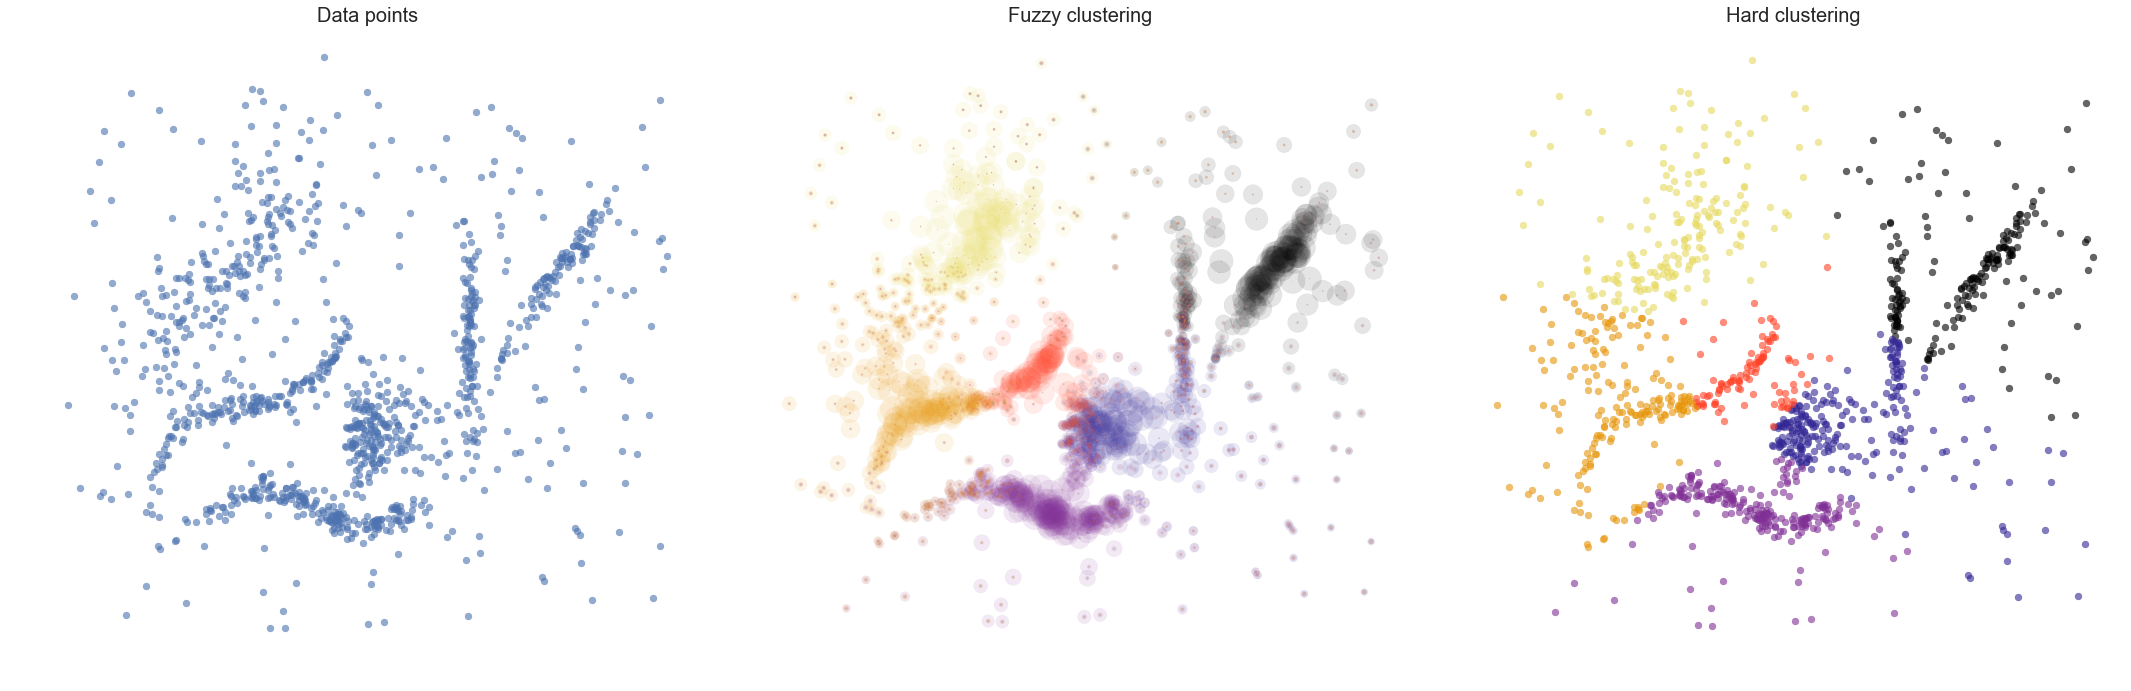

In [16]:
data = fuzzy
c=6
ms = FuzzyCMeans(data,c )
ms.fit()
labels = ms._cluster_labels
Uk = ms._membership 
plot_fuzzy_cmeans(data, labels, Uk,  c, save=True, name='images/fuzzypaper.pdf')

Finished after 10.915555413333333
29 iterations until termination.
Max within cluster distance to center: 1.274252
Mean within cluster distance to center: 0.225787
Sum of within cluster squared errors: 972.567840


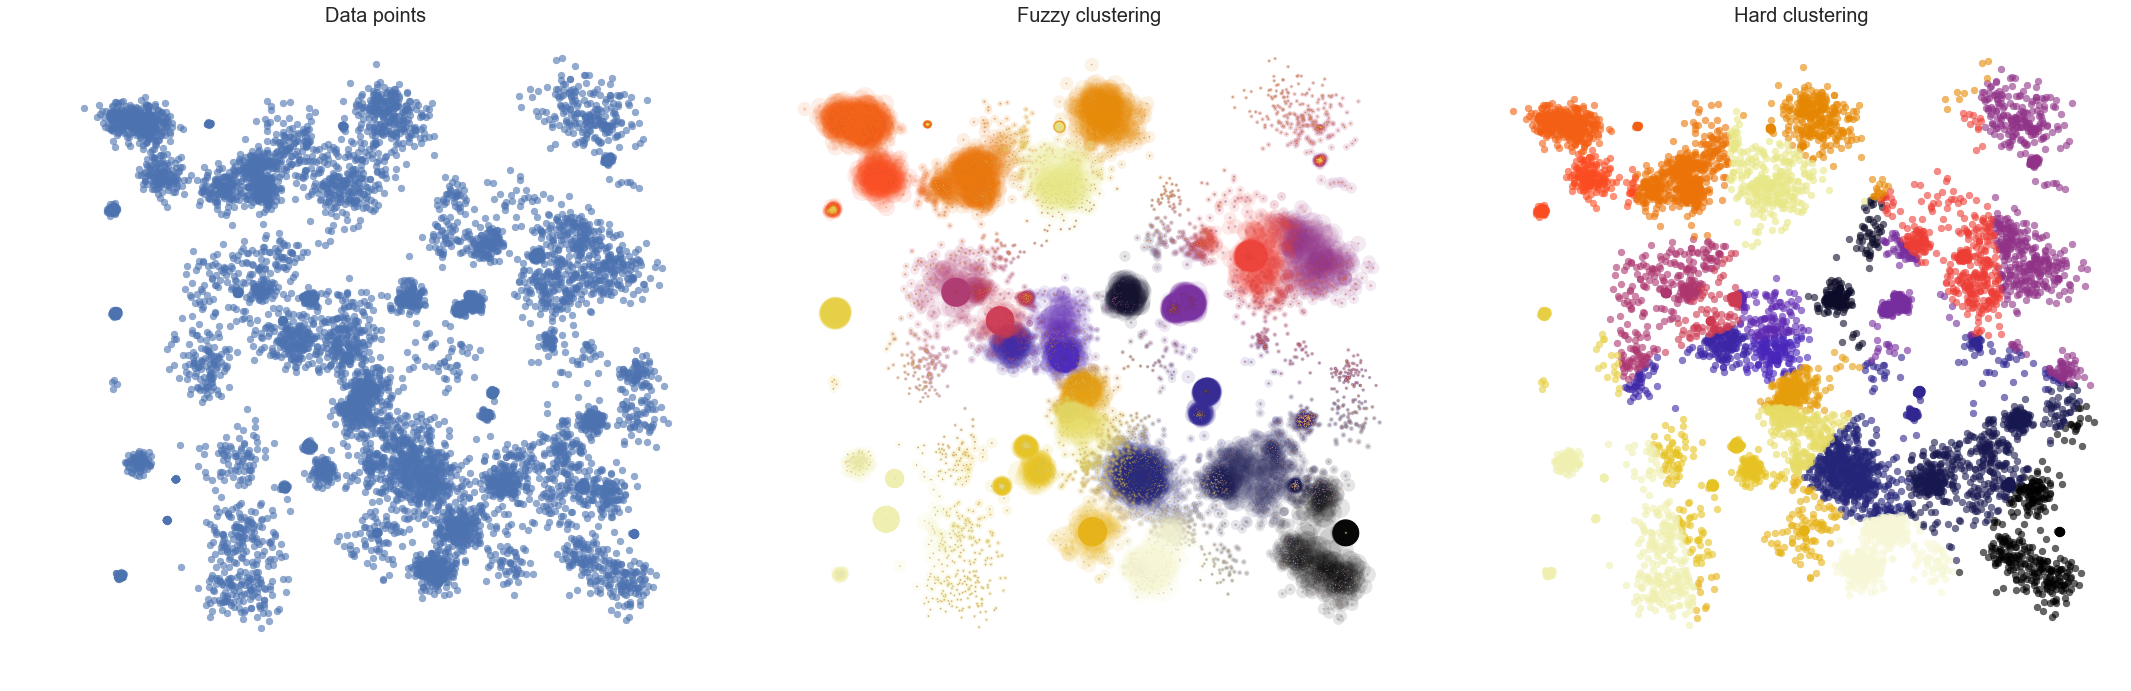

In [17]:
data = load_birch3_data(scale = 'True')
data = data[np.arange(0,100000,10),:2]
c=25
ms = FuzzyCMeans(data,c )
ms.fit()
labels = ms._cluster_labels
Uk = ms._membership 
plot_fuzzy_cmeans(data, labels, Uk,  c, save=True,name='images/fuzzypaperbirch3.pdf')

Finished after 2.689450666666673
29 iterations until termination.
Max within cluster distance to center: 1.494615
Mean within cluster distance to center: 0.268745
Sum of within cluster squared errors: 548.701777


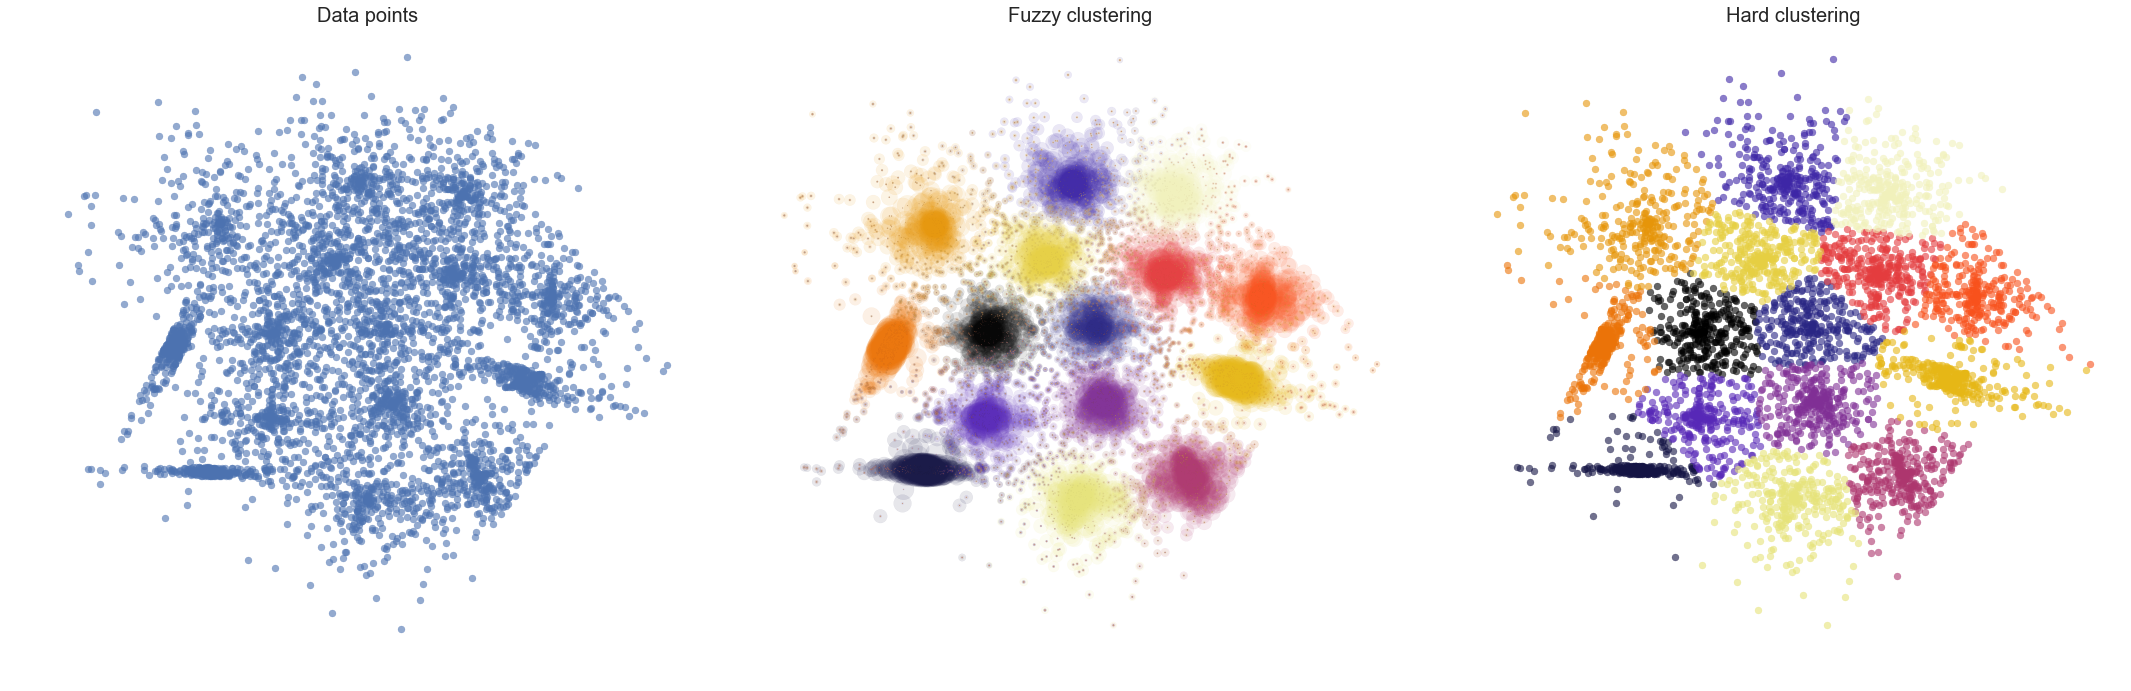

In [18]:
sets=load_sets_data(scale = 'True')
data = sets[:,:2]
c=15
ms = FuzzyCMeans(data,c )
ms.fit()
labels = ms._cluster_labels
Uk = ms._membership 
plot_fuzzy_cmeans(data, labels, Uk,  c, save=True, name='images/fuzzypapersetssmall.pdf')